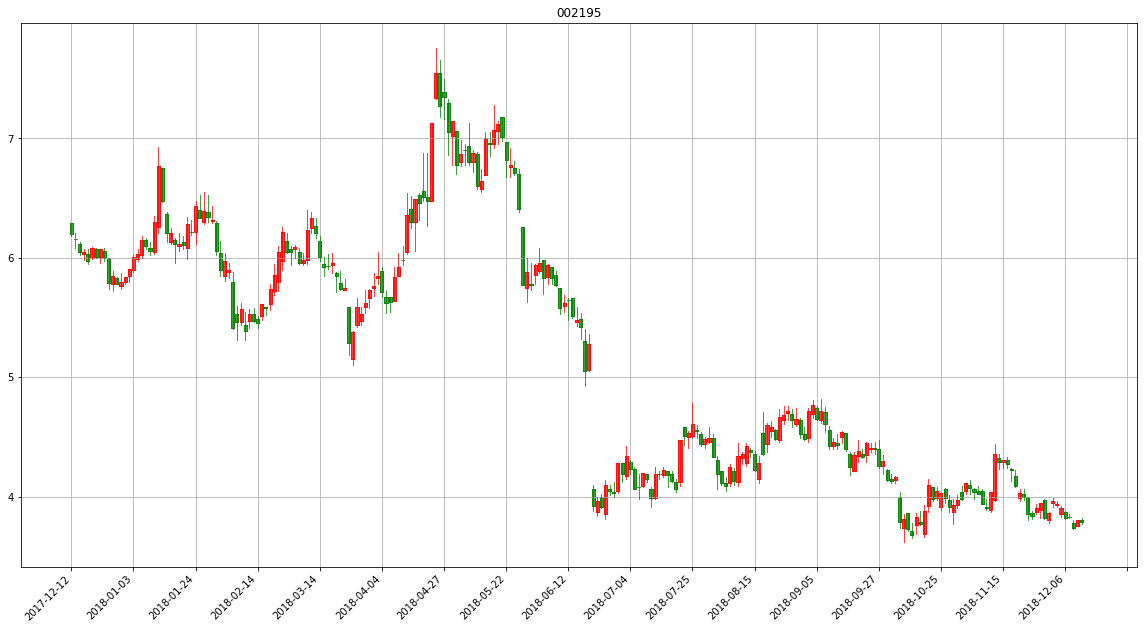

In [5]:
import pandas as pd
import tushare as ts
import datetime
import matplotlib
from matplotlib.dates import DateFormatter, WeekdayLocator,\
    DayLocator, MONDAY
import matplotlib.pyplot as plt
from mpl_finance import candlestick2_ochl
import matplotlib.ticker as ticker

end = datetime.date.today()
#开始时间结束时间，选取最近一年的数据
start = end - datetime.timedelta(days=365)

end = end.strftime('%Y-%m-%d')
start = start.strftime('%Y-%m-%d')

code = "002195"
df = ts.get_hist_data(code, start, end)
df = df.sort_index(0)
df_idx = df.index.values

#    df.plot()

fig, ax = plt.subplots(figsize=(20, 10)) # 设置图片大小。

# https://matplotlib.org/api/finance_api.html#module-matplotlib.finance
# matplotlib.finance.candlestick2_ochl(ax, opens, closes, highs, lows, width=4, colorup='r', colordown='g', alpha=0.75)
candlestick2_ochl(ax = ax, 
                 opens=df["open"].values, closes=df["close"].values,
                 highs=df["high"].values, lows=df["low"].values, 
                 width=0.75, colorup='r', colordown='g', alpha=0.75)

ax.xaxis.set_major_locator(ticker.MaxNLocator(20))
# 设置自动格式化时间。
def mydate_formatter(x,pos):
    try:
        return df_idx[int(x)]
    except IndexError:
        return ''
ax.xaxis.set_major_formatter(ticker.FuncFormatter(mydate_formatter))

plt.setp(plt.gca().get_xticklabels(), rotation=45, horizontalalignment='right')
ax.grid(True)
plt.title(code)
plt.savefig(code + "cc.png")
plt.show()
